In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pyplot
from scipy.stats import norm
import datetime as dt

In [2]:
# Import data
Nat_gas = pd.read_csv("Nat_Gas.csv", index_col=0)

In [3]:
Nat_gas.tail(10)

,Prices
Dates,
12/31/23,12.8
1/31/24,12.6
2/29/24,12.4
3/31/24,12.7
4/30/24,12.1
5/31/24,11.4
6/30/24,11.5
7/31/24,11.6
8/31/24,11.5


In [4]:
Nat_gas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 10/31/20 to 9/30/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0+ bytes


In [5]:
Nat_gas.describe()

,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


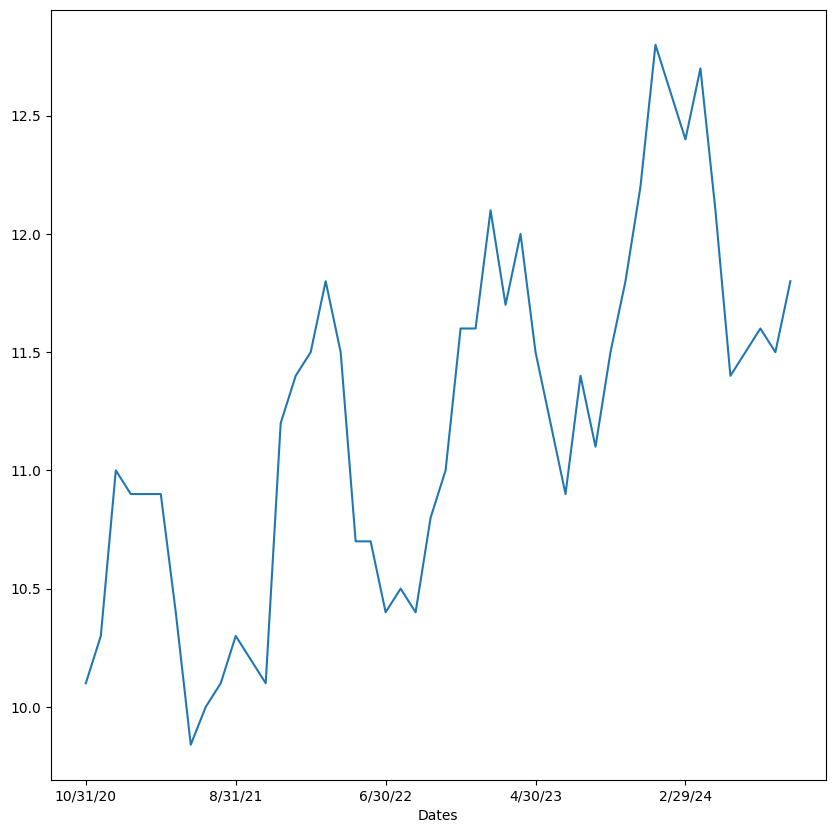

In [6]:
ax = Nat_gas["Prices"].plot(figsize=(10, 10))

In [7]:
print(Nat_gas.index)

Index(['10/31/20', '11/30/20', '12/31/20', '1/31/21', '2/28/21', '3/31/21',
       '4/30/21', '5/31/21', '6/30/21', '7/31/21', '8/31/21', '9/30/21',
       '10/31/21', '11/30/21', '12/31/21', '1/31/22', '2/28/22', '3/31/22',
       '4/30/22', '5/31/22', '6/30/22', '7/31/22', '8/31/22', '9/30/22',
       '10/31/22', '11/30/22', '12/31/22', '1/31/23', '2/28/23', '3/31/23',
       '4/30/23', '5/31/23', '6/30/23', '7/31/23', '8/31/23', '9/30/23',
       '10/31/23', '11/30/23', '12/31/23', '1/31/24', '2/29/24', '3/31/24',
       '4/30/24', '5/31/24', '6/30/24', '7/31/24', '8/31/24', '9/30/24'],
      dtype='object', name='Dates')


In [8]:
Nat_gas["SMA_3"] = Nat_gas.Prices.rolling(3).mean()
Nat_gas["SMA_12"] = Nat_gas.Prices.rolling(10).mean()

In [9]:
Nat_gas

,Prices,SMA_3,SMA_12
Dates,,,
10/31/20,10.10,NaN,NaN
11/30/20,10.30,NaN,NaN
12/31/20,11.00,10.466667,NaN
1/31/21,10.90,10.733333,NaN
2/28/21,10.90,10.933333,NaN
3/31/21,10.90,10.900000,NaN
4/30/21,10.40,10.733333,NaN
5/31/21,9.84,10.380000,NaN
6/30/21,10.00,10.080000,NaN


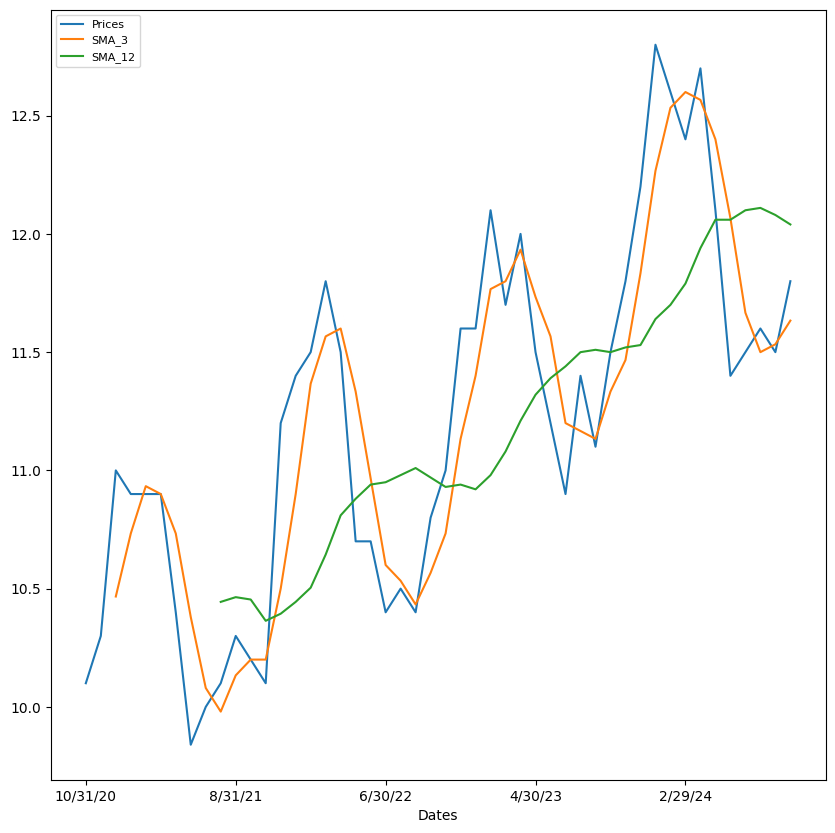

In [10]:
Nat_gas.loc[:, ["Prices", "SMA_3", "SMA_12"]].plot(figsize=(10, 10))
plt.legend(loc="upper left", fontsize=8)
plt.show()

In [11]:
time = np.arange(1, len(Nat_gas) + 1)
Nat_gas['time'] = time
data = Nat_gas[['time', 'Prices']]
data.tail()

,time,Prices
Dates,,
5/31/24,44,11.4
6/30/24,45,11.5
7/31/24,46,11.6
8/31/24,47,11.5
9/30/24,48,11.8


In [12]:
time

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [13]:
Nat_gas.tail()

,Prices,SMA_3,SMA_12,time
Dates,,,,
5/31/24,11.4,12.066667,12.06,44
6/30/24,11.5,11.666667,12.10,45
7/31/24,11.6,11.500000,12.11,46
8/31/24,11.5,11.533333,12.08,47
9/30/24,11.8,11.633333,12.04,48


In [14]:
reg = np.polyfit(data['time'], data["Prices"], deg = 1)
reg

array([ 0.03901324, 10.25125887])

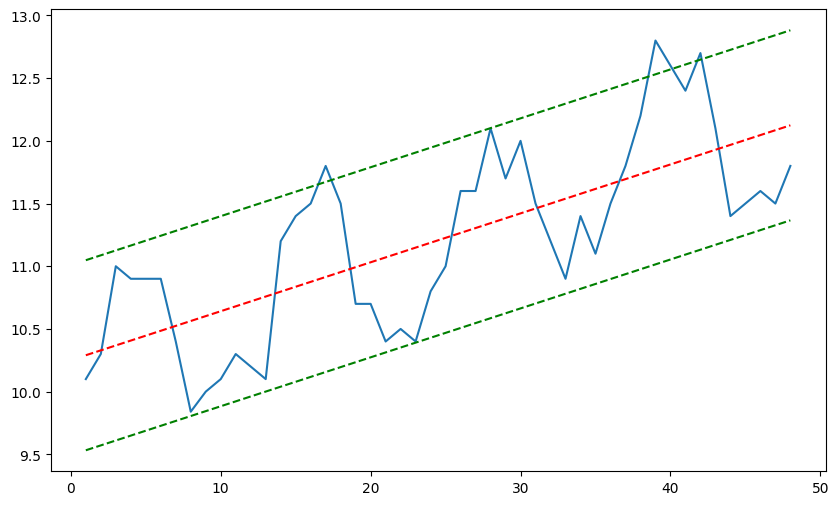

In [15]:
trend = np.polyval(reg, data['time'])
std = data['Prices'].std()
plt.figure(figsize=(10,6))
plt.plot(data['time'].values, data['Prices'].values)
plt.plot(data['time'].values, trend, 'r--')
plt.plot(data['time'].values, trend - std, 'g--')
plt.plot(data['time'].values, trend + std, 'g--');

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
result = seasonal_decompose(Nat_gas['Prices'], model='multiplicative', period= 12)

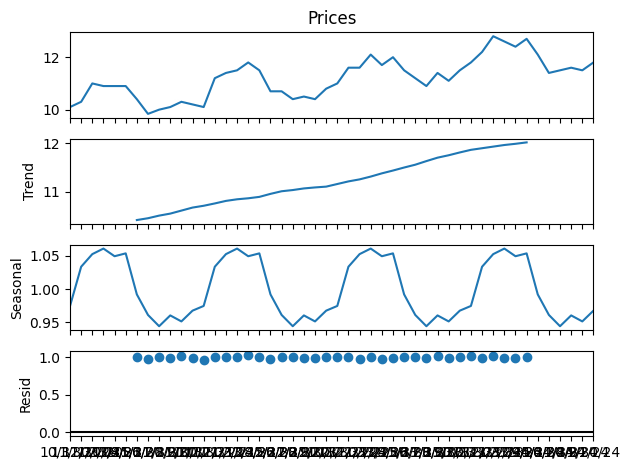

In [18]:
result.plot()
plt.show()

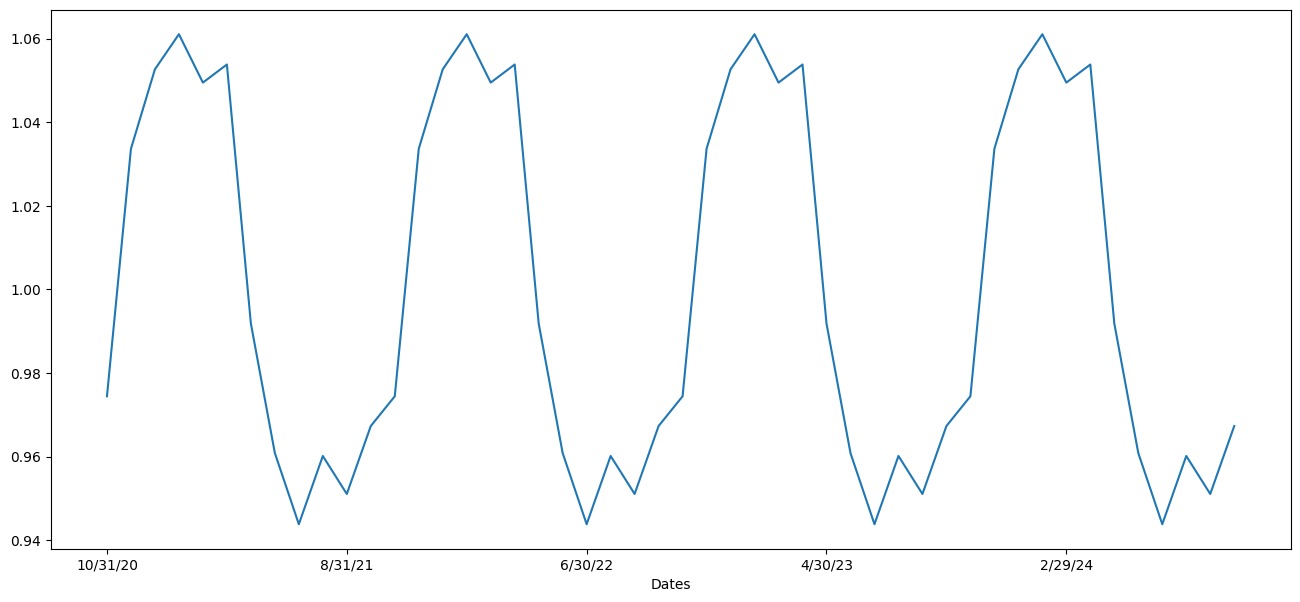

In [19]:
plt.figure(figsize=(16, 7))
result.seasonal.plot();

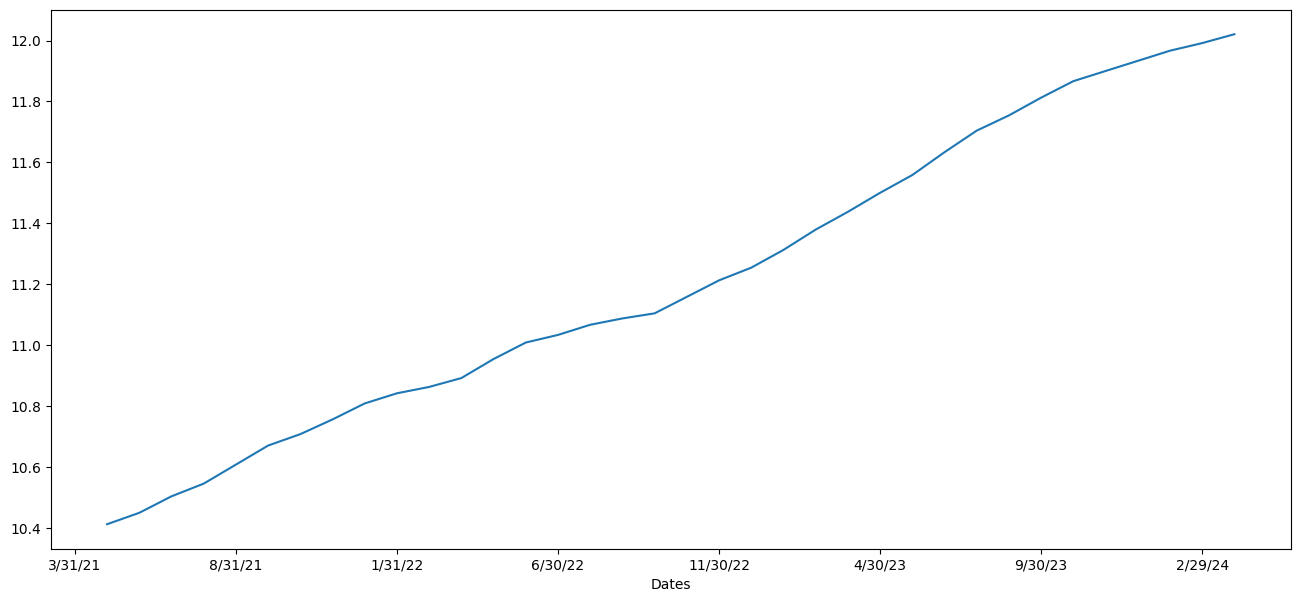

In [20]:
plt.figure(figsize=(16, 7))
result.trend.plot();

# Forecasting using SARIMA

In [21]:
# Import data
Nat_gas_df = pd.read_csv("Nat_Gas.csv")

In [22]:
Nat_gas_df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
Nat_gas_df['Dates'] = pd.to_datetime(Nat_gas_df['Dates'])

/var/folders/18/r7sww6y93kj763sccggn9hzm0000gn/T/ipykernel_49464/1814694037.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Nat_gas_df['Dates'] = pd.to_datetime(Nat_gas_df['Dates'])


In [25]:
Nat_gas_df.head()

,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


In [26]:
Nat_gas_df.set_index('Dates', inplace=True)

In [27]:
Nat_gas_df.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


<Axes: xlabel='Dates'>

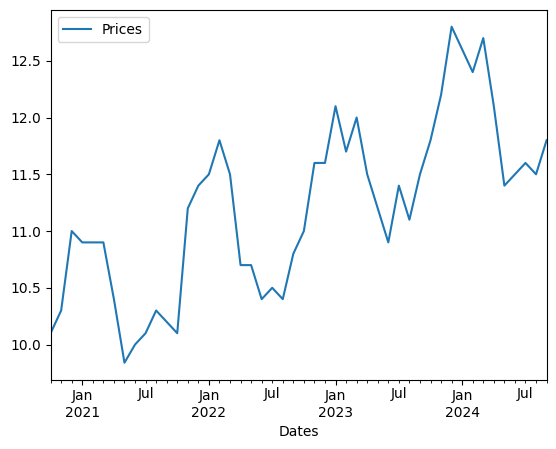

In [28]:
Nat_gas_df.plot()

In [29]:
### Testing for Stationarity
from statsmodels.tsa.stattools import adfuller

In [30]:
test_result = adfuller(Nat_gas_df['Prices'])

In [31]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Prices):
    result=adfuller(Prices)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [32]:
adfuller_test(Nat_gas_df['Prices'])

ADF Test Statistic : 0.21807686169999216
p-value : 0.9732574388448689
#Lags Used : 10
Number of Observations Used : 37
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [33]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

/Users/shaunjoe/Documents/Git_Files/JPMorgan-Quantitative-Research/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [34]:
#Let's run auto_arima() function to get best p,d,q,P,D,Q values

pm.auto_arima(Nat_gas_df['Prices'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4,
               trace=True,error_action='ignore', suppress_warnings=True, stepwise=True).summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=37.883, Time=2.54 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=48.334, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=38.394, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=42.336, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=46.741, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=39.810, Time=2.00 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=39.864, Time=1.67 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=38.317, Time=1.03 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=35.984, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=53.197, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=53.566, Time=0.03 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=53.701, Time=0.07 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=53.674, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=51.953,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 -11.992
Date:                Wed, 03 Jul 2024   AIC                             35.984
Time:                        01:34:33   BIC                             47.085
Sample:                    10-31-2020   HQIC                            40.162
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0091      0.008      1.131      0.258      -0.007       0.025
ar.L1          1.6979      0.050     34.112      0.000       1.600       1.795
ar.L2         -0.9633      0.047    -20.656      0.000      -1.055      -0.872
ma.L1         -1.8116      0.390     -4.649      0.000      -2.575      -1.048
ma.L2          0.9645      0.433      2.229      0.026       0.117       1.812
sigma2         0.0880      0.036      2.416      0.016       0.017       0.159
===================================================================================
Ljung-Box (L1) (Q):                   6.58   Jarque-Bera (JB):                 2.31
Prob(Q):                              0.01   Prob(JB):                         0.31
Heteroskedasticity (H):               0.85   Skew:                             0.51
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# Let's split the data into train and test set

train_data = Nat_gas_df[:len(Nat_gas_df)-12]
test_data = Nat_gas_df[len(Nat_gas_df)-12:]

In [36]:
arima_model = SARIMAX(train_data['Prices'], order = (2,1,2), seasonal_order = (1,1,1,12))
arima_result = arima_model.fit()
arima_result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63074D-01    |proj g|=  1.65398D-01


/Users/shaunjoe/Documents/Git_Files/JPMorgan-Quantitative-Research/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/shaunjoe/Documents/Git_Files/JPMorgan-Quantitative-Research/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/shaunjoe/Documents/Git_Files/JPMorgan-Quantitative-Research/venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  7.81434D-02    |proj g|=  1.75981D-01

At iterate   10    f=  4.62331D-02    |proj g|=  1.30519D-01

At iterate   15    f=  4.25321D-02    |proj g|=  5.92188D-02

At iterate   20    f=  1.69214D-02    |proj g|=  1.82692D-01

At iterate   25    f=  5.52075D-03    |proj g|=  1.02623D-01

At iterate   30    f= -2.63478D-03    |proj g|=  2.54006D-02

At iterate   35    f= -4.01136D-03    |proj g|=  2.14453D-03

At iterate   40    f= -4.36236D-03    |proj g|=  2.25129D-02

At iterate   45    f= -4.46184D-03    |proj g|=  4.65475D-03

At iterate   50    f= -4.64394D-03    |proj g|=  1.15060D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/shaunjoe/Documents/Git_Files/JPMorgan-Quantitative-Research/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               Prices   No. Observations:                   36
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                   0.167
Date:                              Wed, 03 Jul 2024   AIC                             13.666
Time:                                      01:34:34   BIC                             21.614
Sample:                                  10-31-2020   HQIC                            15.665
                                       - 09-30-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0943    112.226     -0.010      0.992    -221.054     218.865
ar.L2         -0.0946     10.766     -0.009      0.993     -21.196      21.007
ma.L1         -0.2568   1254.576     -0.000      1.000   -2459.180    2458.667
ma.L2         -0.7431    932.282     -0.001      0.999   -1827.982    1826.496
ar.S.L12      -0.6450      0.778     -0.829      0.407      -2.170       0.880
ma.S.L12      -0.9976   1616.056     -0.001      1.000   -3168.409    3166.414
sigma2         0.0156     30.879      0.001      1.000     -60.506      60.537
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.84   Prob(JB):                         0.82
Heteroskedasticity (H):               0.92   Skew:                            -0.22
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
arima_pred = arima_result.predict(start = len(train_data), end = len(Nat_gas_df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

/Users/shaunjoe/Documents/Git_Files/JPMorgan-Quantitative-Research/venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2023-10-31    11.122827
2023-11-30    12.294393
2023-12-31    12.406417
2024-01-31    12.669092
2024-02-29    12.660210
2024-03-31    12.667197
2024-04-30    11.677898
2024-05-31    11.728595
2024-06-30    11.412150
2024-07-31    11.637428
2024-08-31    11.530194
2024-09-30    11.863210
Freq: M, Name: ARIMA Predictions, dtype: float64

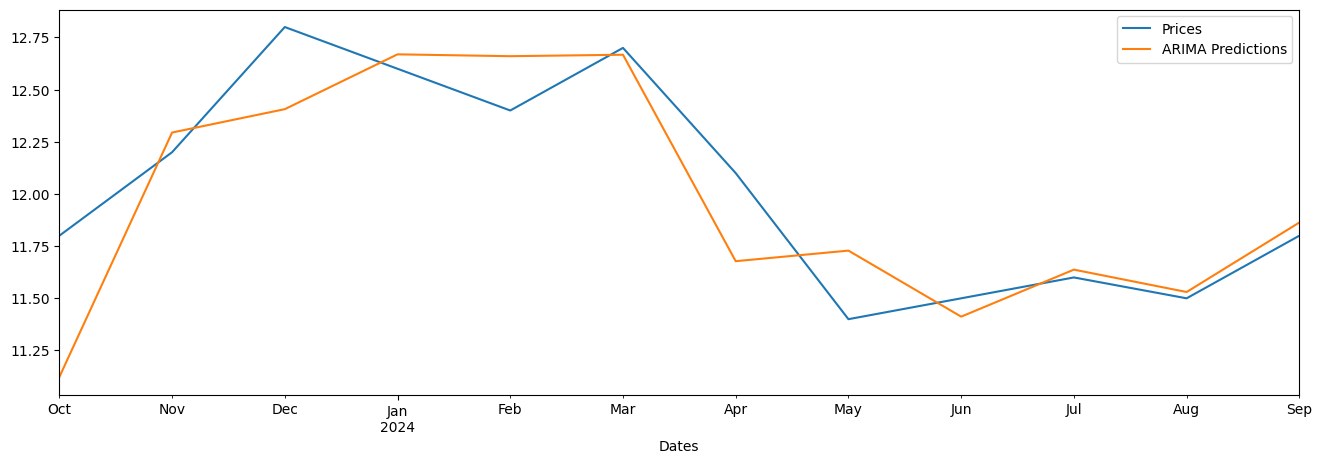

In [38]:
test_data['Prices'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

<Axes: xlabel='Dates'>

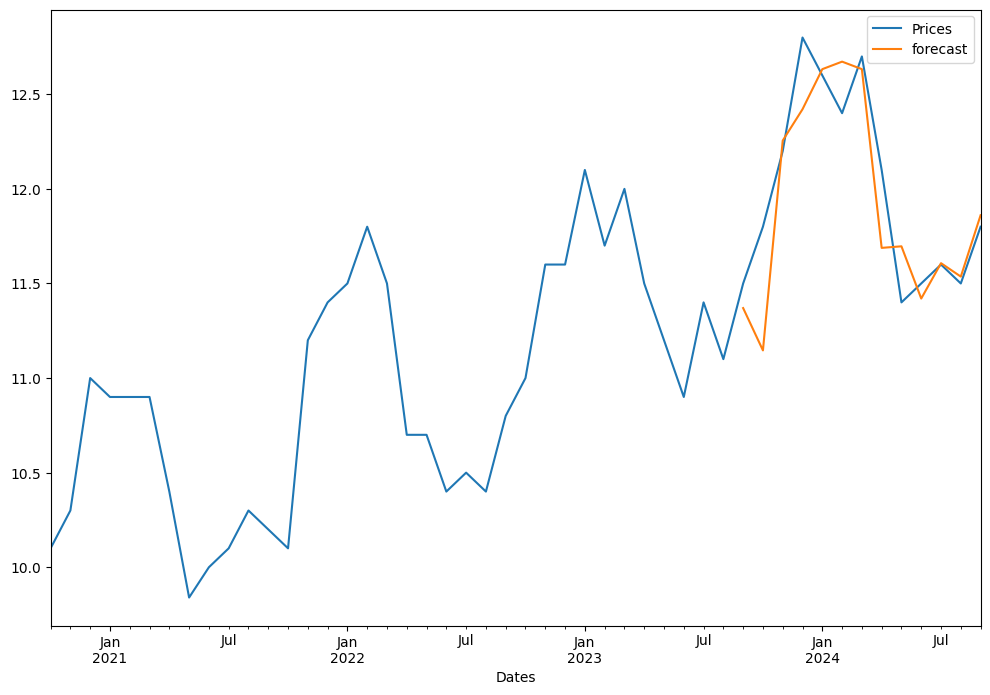

In [39]:
Nat_gas_df['forecast']=arima_result.predict(start=35,end=47,dynamic=True)
Nat_gas_df[['Prices','forecast']].plot(figsize=(12,8))

In [40]:
Nat_gas_df.tail(12)

,Prices,forecast
Dates,,
2023-10-31,11.8,11.146215
2023-11-30,12.2,12.255324
2023-12-31,12.8,12.420839
2024-01-31,12.6,12.632741
2024-02-29,12.4,12.672505
2024-03-31,12.7,12.632916
2024-04-30,12.1,11.688128
2024-05-31,11.4,11.696379
2024-06-30,11.5,11.420315


In [41]:
test_data['ARIMA_Predictions'] = arima_pred

/var/folders/18/r7sww6y93kj763sccggn9hzm0000gn/T/ipykernel_49464/3839166069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA_Predictions'] = arima_pred


In [42]:
test_data

,Prices,ARIMA_Predictions
Dates,,
2023-10-31,11.8,11.122827
2023-11-30,12.2,12.294393
2023-12-31,12.8,12.406417
2024-01-31,12.6,12.669092
2024-02-29,12.4,12.660210
2024-03-31,12.7,12.667197
2024-04-30,12.1,11.677898
2024-05-31,11.4,11.728595
2024-06-30,11.5,11.412150


In [43]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [44]:
arima_rmse_error = rmse(test_data['Prices'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = Nat_gas_df['Prices'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 0.08300922583151396
RMSE Error: 0.28811321703718135
Mean: 11.207083333333332


# Run entire code after entering date

In [45]:
arima_pred_full = arima_result.predict(start = 0, end = len(Nat_gas_df)-1, typ="levels").rename("ARIMA Predictions")

/Users/shaunjoe/Documents/Git_Files/JPMorgan-Quantitative-Research/venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [46]:
#enter Month and year in following format 'yyyy/mm/dd' -- KEEP day at end of the month AND THEN Run the ENTIRE code
#example : userdate = 2024-05-31
userdate = '2024-05-31'
arima_pred_full.loc[userdate]

11.728594607048446

In [47]:
# Actual Price
Nat_gas_df.loc[userdate]['Prices']

11.4

# Extrapolate 1 year in the future

In [48]:
#enter Month and year in following format 'yyyy/mm/dd' -- KEEP day at end of the month AND THEN Run the ENTIRE code
#example : userdate = 2024-05-31
userdate = '2020-12-31'
start = Nat_gas_df.index.get_loc(userdate)
arima_pred_future = arima_result.predict(start = start, end = start+12, typ="levels").rename("ARIMA Predictions")

In [49]:
arima_pred_future.tail(1)

2021-12-31    11.270167
Freq: M, Name: ARIMA Predictions, dtype: float64

In [50]:
# Actual Price in next 12 months
Nat_gas_df.iloc[start+12]

Prices      11.4
forecast     NaN
Name: 2021-12-31 00:00:00, dtype: float64

# Forecasting using Prophet

In [51]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

/Users/shaunjoe/Documents/Git_Files/JPMorgan-Quantitative-Research/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [52]:
#read in the data
df = pd.read_csv('Nat_Gas.csv')
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [53]:
#Select the date and the price
df = df[['Dates', 'Prices']]
#Rename the features:
df = df.rename(columns={'Dates':'ds', 'Prices':'y'})
df.head()

,ds,y
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [54]:
# Get last 12 rows of data and store them into a new variable
last = df[len(df)-12:]
last

,ds,y
36,10/31/23,11.8
37,11/30/23,12.2
38,12/31/23,12.8
39,1/31/24,12.6
40,2/29/24,12.4
41,3/31/24,12.7
42,4/30/24,12.1
43,5/31/24,11.4
44,6/30/24,11.5
45,7/31/24,11.6


In [55]:
#Get all rows except the last 12
df = df[:-12]
df.head()

,ds,y
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [56]:
#Creating Prophet Object (Model)
fbp = Prophet(seasonality_mode='multiplicative', mcmc_samples=360)

#Train the model
fbp.fit(df)
future = fbp.make_future_dataframe(periods=24, freq='M')
forecast = fbp.predict(future)

/Users/shaunjoe/Documents/Git_Files/JPMorgan-Quantitative-Research/venv/lib/python3.9/site-packages/prophet/forecaster.py:1133: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.history_dates = pd.to_datetime(pd.Series(history['ds'].unique(), name='ds')).sort_values()
/Users/shaunjoe/Documents/Git_Files/JPMorgan-Quantitative-Research/venv/lib/python3.9/site-packages/prophet/forecaster.py:287: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])
01:34:35 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |████      | 00:00 Iteration:   1 / 360 [  0%]  (Warmup)

chain 1 |██████    | 00:01 Iteration: 100 / 360 [ 27%]  (Warmup)


chain 1 |███████


01:34:37 - cmdstanpy - INFO - CmdStan done processing.
01:34:37 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!


In [57]:
forecast.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
45,2024-07-31,12.508796,11.119756,12.605196,11.952536,13.075054,-0.051102,-0.087483,-0.012164,-0.051102,-0.087483,-0.012164,0.0,0.0,0.0,11.869568
46,2024-08-31,12.576562,11.566466,13.172178,11.956644,13.188185,-0.016026,-0.054059,0.020335,-0.016026,-0.054059,0.020335,0.0,0.0,0.0,12.375012
47,2024-09-30,12.642141,11.144608,12.909410,11.944974,13.310624,-0.045654,-0.080037,-0.013552,-0.045654,-0.080037,-0.013552,0.0,0.0,0.0,12.064973
48,2024-10-31,12.709906,11.513985,13.140601,11.957024,13.441442,-0.029360,-0.054454,-0.005340,-0.029360,-0.054454,-0.005340,0.0,0.0,0.0,12.336744
49,2024-11-30,12.775486,11.984602,13.785265,11.953236,13.573430,0.009419,-0.012743,0.031970,0.009419,-0.012743,0.031970,0.0,0.0,0.0,12.895819
50,2024-12-31,12.843251,12.651403,14.764232,11.935704,13.723481,0.069142,0.044957,0.093993,0.069142,0.044957,0.093993,0.0,0.0,0.0,13.731257
51,2025-01-31,12.911016,12.475004,14.708335,11.905498,13.866568,0.052735,0.024913,0.082762,0.052735,0.024913,0.082762,0.0,0.0,0.0,13.591876
52,2025-02-28,12.972223,12.585491,15.026105,11.873747,14.000512,0.063415,0.046945,0.080266,0.063415,0.046945,0.080266,0.0,0.0,0.0,13.794857
53,2025-03-31,13.039989,12.433104,14.862771,11.846772,14.155461,0.048167,0.023950,0.070667,0.048167,0.023950,0.070667,0.0,0.0,0.0,13.668090
54,2025-04-30,13.105568,11.625249,14.200070,11.823395,14.320808,-0.012282,-0.034532,0.010624,-0.012282,-0.034532,0.010624,0.0,0.0,0.0,12.944601


In [58]:
# #Show the models prediction for 8/31/24
forecast[forecast.ds == '8/31/24']['yhat']

46    12.375012
Name: yhat, dtype: float64

In [59]:
#Actual price for 8/31/24
last[last.ds == '8/31/24']['y']

46    11.5
Name: y, dtype: float64

# Run entire code after entering date

In [60]:
future = fbp.make_future_dataframe(periods=120, freq='MS')
forecast = fbp.predict(future)

#enter Month and year in following format 'mm/01/yy' -- KEEP day @ '01' AND THEN Run the ENTIRE code
#example : userdate = 01/01/24
userdate = '01/01/24'
forecast[forecast.ds == userdate]['yhat']

39    13.092853
Name: yhat, dtype: float64

In [61]:
#Actual price for user date
last[last.ds == '1/31/24']['y']

39    12.6
Name: y, dtype: float64

In [62]:
forecast[forecast.ds == userdate].index.values

array([39])

In [63]:
# Forecast of Price next 12 months
T = forecast[forecast.ds == userdate].index.values +12
forecast.iloc[T]['yhat']

51    14.631753
Name: yhat, dtype: float64